In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [44]:
from PIL import Image
from sklearn.model_selection import train_test_split

In [45]:
folders = ['bottom_left', 'bottom_right', 'bottom_middle', 'top_left', 'top_right', 'top_middle', 'left_middle', 'right_middle','middle']

In [46]:
os.listdir('two_eyes/bottom_left')

['1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '17.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '

In [47]:
import cv2

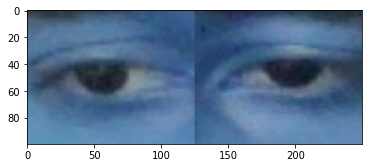

In [48]:
img = cv2.imread('two_eyes/bottom_left/1.jpg')
plt.imshow(img)

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Processing 
Resize the image 
convert the image to numpy array

In [50]:
list1 = []
data = []
augmented_data = []
augmented_data_labels = []

# Iterate over the folders and load the images
for i, folder in enumerate(folders):
    for files in os.listdir(f'two_eyes/{folder}'):
        img = cv2.imread(f'two_eyes/{folder}/{files}')
        img = cv2.resize(img, (250, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        data.append(img)
        list1.append(i)

        # # Apply data augmentation
        # img_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
        #                                    shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
        # augmented_images = img_generator.flow(np.expand_dims(img, axis=0), batch_size=1)

        # # Save the augmented images
        # for j in range(5):  # Generate 5 augmented images per original image
        #     augmented_img = augmented_images.next()[0].astype(np.uint8)
        #     augmented_data.append(augmented_img)
        #     augmented_data_labels.append(i)

In [51]:
# plt.imshow(augmented_data[])

In [52]:
len(data), len(augmented_data)

(4775, 0)

In [53]:
type(data)

list

In [54]:
# add augmented_data_label to list1
list1.extend(augmented_data_labels)
len(list1), list1


(4775,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [55]:
data.extend(augmented_data)

In [56]:
len(data)

4775

In [57]:
list1 = np.array(list1)
list1

array([0, 0, 0, ..., 8, 8, 8])

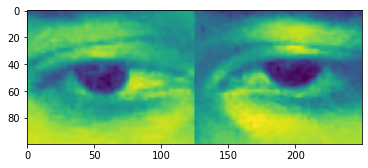

In [58]:
plt.imshow(data[0])

In [59]:
len(data), len(list1)

(4775, 4775)

In [60]:
list1

array([0, 0, 0, ..., 8, 8, 8])

# convert the image list to numpy array

In [61]:
data = np.array(data)

In [62]:
data.shape

(4775, 100, 250)

In [63]:
data = data.astype('float32')
data = data/255

In [64]:
data

array([[[0.22352941, 0.22745098, 0.23137255, ..., 0.23137255,
         0.22745098, 0.22745098],
        [0.24313726, 0.24313726, 0.24313726, ..., 0.21960784,
         0.21568628, 0.21176471],
        [0.2627451 , 0.2627451 , 0.2627451 , ..., 0.20392157,
         0.18431373, 0.18431373],
        ...,
        [0.6039216 , 0.6039216 , 0.6       , ..., 0.5686275 ,
         0.5686275 , 0.5686275 ],
        [0.6       , 0.6       , 0.6       , ..., 0.57254905,
         0.57254905, 0.57254905],
        [0.6       , 0.6       , 0.6       , ..., 0.57254905,
         0.5764706 , 0.5764706 ]],

       [[0.37254903, 0.37254903, 0.37254903, ..., 0.14901961,
         0.14509805, 0.14509805],
        [0.37254903, 0.37254903, 0.37254903, ..., 0.15294118,
         0.15294118, 0.15294118],
        [0.3882353 , 0.3882353 , 0.38431373, ..., 0.16470589,
         0.16470589, 0.16470589],
        ...,
        [0.5882353 , 0.5882353 , 0.5882353 , ..., 0.5058824 ,
         0.5058824 , 0.5058824 ],
        [0.5

In [65]:
# import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, list1, test_size=0.2, random_state=42)

In [66]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3820, 100, 250), (955, 100, 250), (3820,), (955,))

# Building the convolution Neural Network(CNN)

In [67]:
import tensorflow as tf
from tensorflow import keras

In [68]:
num_class = len(folders)
num_class

9

In [69]:
x_train.shape[1:]

(100, 250)

In [70]:
# model = keras.Sequential()
# # Adding the first CNN layers
# # input shape= (height, width, 1)
# model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 250, 1)))
# # Adding the second layer with maxpooling
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


# # Adding the third layer
# model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# # Adding the fourth layer with maxpooling
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# # Adding the flatten layer
# model.add(keras.layers.Flatten())
# # Adding the first dense layer
# # units = 128 is the number of neurons
# model.add(keras.layers.Dense(units=128, activation='relu'))
# model.add(keras.layers.Dropout(rate=0.5))



# model.add(keras.layers.Dense(units=64, activation='relu'))
# model.add(keras.layers.Dropout(rate=0.5))


# # Add the second dense layer (output layer)
# model.add(keras.layers.Dense(units=num_class, activation='softmax'))

In [71]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the number of classes
num_classes = len(folders)
# Create the model
model = Sequential()

# Adding the first CNN layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 250, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding additional convolutional layers
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.5))

# Output layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 248, 32)       320       
                                                                 
 batch_normalization (BatchN  (None, 98, 248, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 124, 32)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 122, 128)      36992     
                                                                 
 batch_normalization_1 (Batc  (None, 47, 122, 128)     512       
 hNormalization)                                                 
                                                      

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 248, 32)       320       
                                                                 
 batch_normalization (BatchN  (None, 98, 248, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 124, 32)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 122, 128)      36992     
                                                                 
 batch_normalization_1 (Batc  (None, 47, 122, 128)     512       
 hNormalization)                                                 
                                                      

# Training the CNN

In [73]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
x_train.shape

(3820, 100, 250)

In [75]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [76]:
x_train.shape

(3820, 100, 250, 1)

In [77]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15


 34/120 [=======>......................] - ETA: 3:51 - loss: 12.1322 - accuracy: 0.3382

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

30/30 [==============================] - 4s 130ms/step - loss: 0.0420 - accuracy: 0.9948


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred, y_test

30/30 [==============================] - 4s 126ms/step


(array([0, 1, 8, 6, 7, 4, 8, 8, 0, 4, 7, 3, 6, 2, 3, 8, 2, 1, 7, 7, 5, 4,
        2, 7, 4, 8, 3, 6, 1, 8, 7, 6, 5, 2, 5, 0, 7, 8, 6, 8, 0, 0, 4, 3,
        5, 5, 3, 5, 3, 6, 2, 6, 2, 7, 4, 4, 3, 6, 4, 0, 7, 5, 7, 4, 3, 7,
        6, 8, 6, 0, 5, 5, 0, 6, 1, 7, 6, 5, 0, 6, 4, 1, 0, 1, 0, 1, 5, 3,
        4, 1, 4, 3, 8, 5, 1, 6, 1, 3, 4, 0, 1, 3, 4, 7, 8, 8, 6, 3, 0, 8,
        3, 3, 6, 8, 2, 1, 4, 1, 3, 2, 5, 0, 4, 7, 4, 2, 1, 6, 4, 6, 8, 6,
        3, 0, 4, 3, 4, 1, 2, 0, 2, 3, 6, 1, 7, 2, 3, 2, 1, 1, 1, 5, 7, 0,
        2, 3, 6, 0, 6, 2, 1, 5, 6, 3, 4, 5, 8, 5, 5, 4, 7, 3, 4, 3, 0, 2,
        3, 5, 2, 0, 7, 8, 6, 2, 0, 7, 4, 1, 4, 3, 8, 3, 4, 8, 2, 6, 6, 6,
        5, 6, 7, 6, 8, 1, 5, 2, 2, 6, 0, 0, 0, 8, 4, 0, 2, 0, 5, 7, 2, 7,
        7, 8, 0, 7, 0, 4, 0, 3, 5, 4, 0, 4, 4, 7, 1, 7, 1, 3, 4, 1, 6, 3,
        1, 6, 5, 2, 6, 0, 6, 6, 1, 0, 3, 4, 5, 6, 1, 4, 3, 8, 6, 5, 8, 2,
        7, 8, 1, 1, 8, 3, 8, 3, 6, 1, 8, 7, 6, 0, 4, 3, 0, 6, 7, 4, 1, 0,
        1, 3, 6, 1, 0, 3, 5, 0, 2, 5, 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [ ]:
cm, acc

(array([[118,   0,   1,   0,   0,   0,   0,   0,   0],
        [  0,  96,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,  84,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 112,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 111,   1,   0,   0,   0],
        [  0,   0,   0,   0,   3,  97,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 117,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  98,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0, 117]], dtype=int64),
 0.9947643979057592)

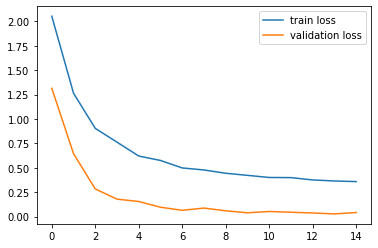

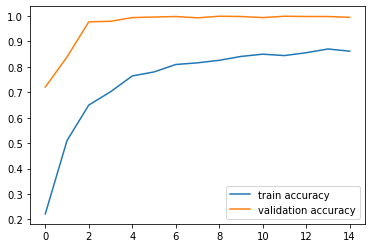

In [ ]:
# plot the loss value
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy values
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('latest3.h5')

In [ ]:
# import cv2
# import numpy as np

# eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# # Load your pre-trained CNN model
# def detect_eyes(image):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))
#     return eyes

# def estimate_gaze(eyes, image):
#     height, width, _ = image.shape
#     eye_centers = []
#     eye_coordinates = []
#     for (x, y, w, h) in eyes:
#         center_x = x + w // 2
#         center_y = y + h // 2
#         eye_centers.append((center_x, center_y))

#         # Draw bounding boxes around the eyes
#         cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
#         cv2.circle(image, (center_x, center_y), 2, (0, 0, 255), 2)
#     return eyes

# # Define the desired dimensions
# desired_width = 250
# desired_height = 50

# # Initialize the webcam
# video_capture = cv2.VideoCapture(0)  # 0 represents the default webcam device

# while True:
#     # Capture frame-by-frame from the webcam
#     ret, frame = video_capture.read()
#     eyes = detect_eyes(frame)
#     eye_y = eyes[0][1]
#     eye_x = eyes[0][0]
#     eye_height = eyes[1][1]+eyes[1][3] - eyes[0][1]
#     eye_width = eyes[1][0]+eyes[1][2] - eyes[0][0]

    

#     # Flip the frame horizontally
#     # frame = cv2.flip(frame, 1)

#     # Define the ROI coordinates for the ye portion
    

#     # Extract the eye ROI from the frame
#     eye_roi = frame[eye_y:eye_y+eye_height, eye_x:eye_x+eye_width]

#     # Resize the ROI to match the desired dimensions
#     resized_roi = cv2.resize(eye_roi, (desired_width, desired_height))

#     # Convert the ROI to RGB format
#     resized_roi = cv2.cvtColor(resized_roi, cv2.COLOR_BGR2RGB)

#     # Convert the ROI to numpy array
#     resized_roi = np.asarray(resized_roi)

#     # Expand dimensions to match the input shape of your CNN model
#     resized_roi = np.expand_dims(resized_roi, axis=0)

#     # Normalize pixel values
#     resized_roi = resized_roi / 255.0

#     # Pass the preprocessed ROI through your CNN model for prediction
#     predictions = model.predict(resized_roi)
#     predicted_class = np.argmax(predictions, axis=1)
#     frame = estimate_gaze(eyes, frame)

#     # Display the predicted class
#     if predicted_class[0] == 1:
#         print(folders[predicted_class[0]])
#     # Display the frame with overlays or visual indicators of person detection
#     cv2.imshow('Eye Detection', frame)

#     # Break the loop if 'q' is pressed
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the webcam and close the windows
# video_capture.release()
# cv2.destroyAllWindows()
